# Проект: Статистический анализ данных

# Общая информация об анализируемом объекте

Имеется сервис аренды самокатов GoFast, который предоставил данные о некоторых пользователях из нескольких городов, а также об их поездках. нужно проанализировать данные, проверить некоторые гипотезы, которые смогут помочь бизнесу вырасти

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

# План работы:

1. Изучить данные
2. Сделать предобработку данных
3. Провести исследовательский анализ
4. Проверить несколько гипотез
5. Сделать общий вывод

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

%matplotlib inline

### Шаг 1. Загрузка данных

#### Откроем данные

In [2]:
try:
    users_data = pd.read_csv('C:/Users/99893/yandex_practicum_course/statistical analysis 4 sprint/users_go.csv')
    riders_data = pd.read_csv('C:/Users/99893/yandex_practicum_course/statistical analysis 4 sprint/rides_go.csv')
    subscriptions_data = pd.read_csv('C:/Users/99893/yandex_practicum_course/statistical analysis 4 sprint/subscriptions_go.csv')
except:
    users_data = pd.read_csv('/datasets/users_go.csv')
    riders_data = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')

#### Выведем общую информацию

Первые 3 строки датафреймов:

In [3]:
users_data.head(3)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra


In [4]:
riders_data.head(3)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20


In [5]:
subscriptions_data.head(3)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Общая информация:

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
riders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**

Размеры датафреймов:
- users_data (1565, 5)
- riders_data (18068, 4)
- subscriptions_data (2, 4)

### Шаг 2. Предобработка данных

#### Заменим тип данных

In [9]:
riders_data['date'] = pd.to_datetime(riders_data['date'], format='%Y-%m-%d')

#### Заполним пропуски, если они имеются

In [10]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
riders_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [12]:
subscriptions_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

#### Обработаем дубликаты

In [13]:
users_data.duplicated().sum()

31

In [14]:
users_data.drop_duplicates(inplace=True)
users_data.duplicated().sum()

0

In [15]:
users_data['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [16]:
users_data['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [17]:
riders_data.duplicated().sum()

0

#### Добавим столбцы с годом, номерами месяца и дня недели

In [18]:
riders_data['year'] = riders_data['date'].dt.year
riders_data['month'] = riders_data['date'].dt.month
riders_data['weekday'] = riders_data['date'].dt.weekday

In [19]:
riders_data.groupby('year')['month'].nunique()

year
2021    12
Name: month, dtype: int64

In [20]:
riders_data['date'].min()

Timestamp('2021-01-01 00:00:00')

In [21]:
riders_data['date'].max()

Timestamp('2021-12-30 00:00:00')

In [22]:
riders_data['date'].max() - riders_data['date'].min()

Timedelta('363 days 00:00:00')

**Вывод:**

- Изменение типа данных потребовалось только для столбца с датой (`date` из датафрейма с поездками `riders_data`)
- Пропусков не обнаружено
- Обнаружен 31 дубликат в датафрейме `users_data` (данные о пользователях)

Имеется информация за 2021 год (363 дня)

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

In [23]:
users_data['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

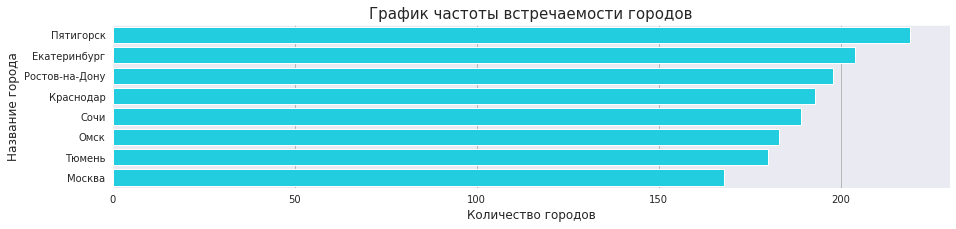

In [24]:
plt.figure(figsize=(15, 3))
sns.set_style('darkgrid', rc={'grid.color': '#ababab'})
sns.countplot(y='city',
              data=users_data,
              order=users_data['city'].value_counts().index,
              color='#01e6ff')
plt.title('График частоты встречаемости городов', fontsize=15)
plt.xlabel('Количество городов', fontsize=12)
plt.ylabel('Название города', fontsize=12);

Больше всего пользователей сервиса GoFast в Пятигорске (219 пользователей) и меньше всего в Москве (168 пользователей)

#### Cоотношение пользователей с подпиской и без подписки

In [25]:
users_data['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

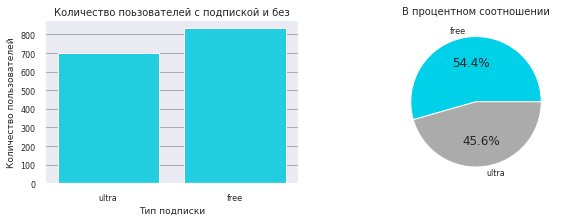

In [26]:
plt.figure(figsize=(10, 3))
sns.set_context('notebook', rc={'xtick.labelsize': 8, 'ytick.labelsize': 8})

plt.subplot(121)
sns.countplot(x='subscription_type',
              data=users_data,
              color='#01e6ff')
plt.title('Количество поьзователей с подпиской и без', fontsize=10)
plt.xlabel('Тип подписки', fontsize=9)
plt.ylabel('Количество пользователей', fontsize=9);

plt.subplot(122)
plt.pie(users_data['subscription_type'].value_counts(),
        colors=['#00d1e8', '#ababab'],
        labels=users_data['subscription_type'].value_counts().index,
        autopct='%.1f%%')
plt.title('В процентном соотношении', fontsize=10);

Пользователей с подписками чуть меньше, чем пользователей без подписки

#### Исследуем возраст пользователей

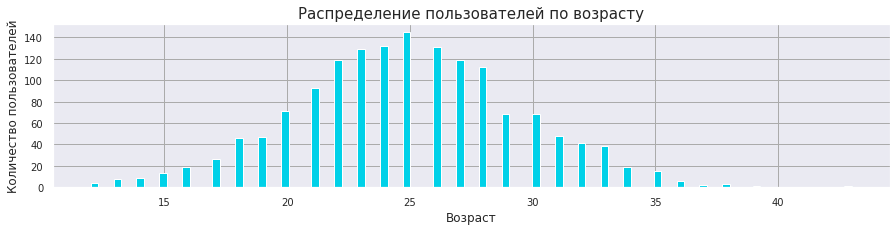

In [27]:
plt.figure(figsize=(15, 3))
sns.set_context('notebook', rc={'xtick.labelsize': 10, 'ytick.labelsize': 10})
plt.hist(users_data['age'], bins=100, color='#00d1e8')
plt.title('Распределение пользователей по возрасту', fontsize=15)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12);

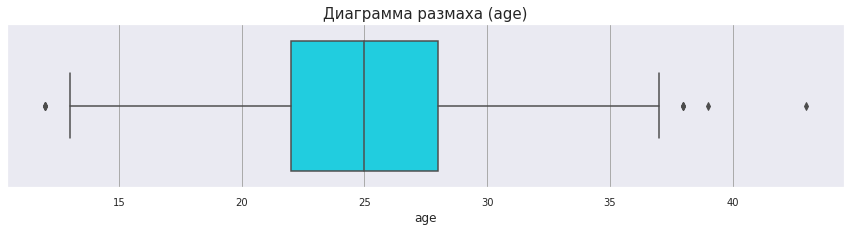

In [28]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=users_data, x='age', color='#01e6ff')
plt.title('Диаграмма размаха (age)', fontsize=15);

Среднее возраста:

In [29]:
round(users_data['age'].mean(), 2)

24.9

Медиана возраста:

In [30]:
round(users_data['age'].median(), 2)

25.0

Мода возраста:

In [31]:
users_data['age'].mode()[0]

25

Все меры центральной тенденции совпадают, значит дополнительно фильтровать данные от выбрасов нет смысла. Средний возраст пользователей сервиса GoFast - 25 лет

<AxesSubplot:xlabel='city'>

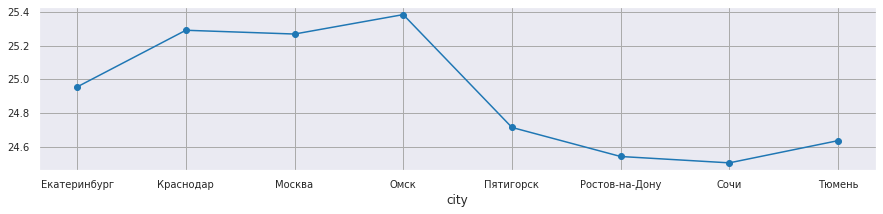

In [32]:
plt.figure(figsize=(15, 3))
users_data.groupby('city')['age'].mean().plot(kind='line', style='o-')

В каждом из городов средний возраст составляет примерно 25 лет, нет сильных различий

#### Исследуем расстояние, которое пользователь преодолел за одну поездку

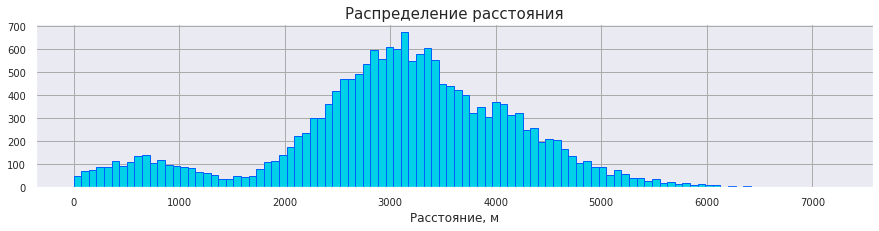

In [33]:
plt.figure(figsize=(15, 3))
riders_data['distance'].hist(bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение расстояния', fontsize=15)
plt.xlabel('Расстояние, м', fontsize=12);

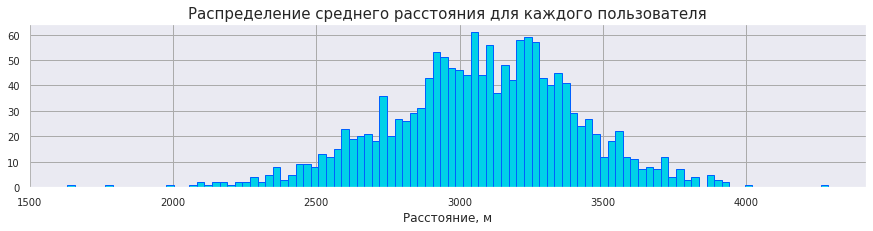

In [34]:
plt.figure(figsize=(15, 3))
riders_data.groupby('user_id')['distance'].mean().hist(bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение среднего расстояния для каждого пользователя', fontsize=15)
plt.xlabel('Расстояние, м', fontsize=12);

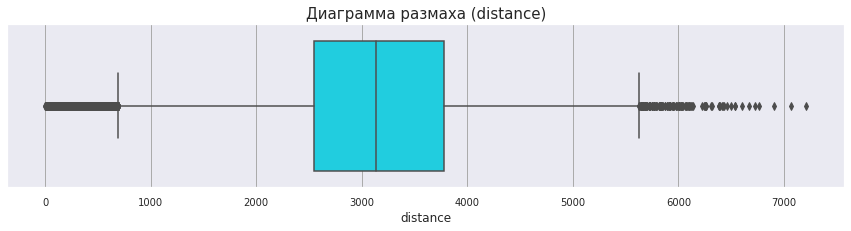

In [35]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=riders_data, x='distance', color='#01e6ff')
plt.title('Диаграмма размаха (distance)', fontsize=15);

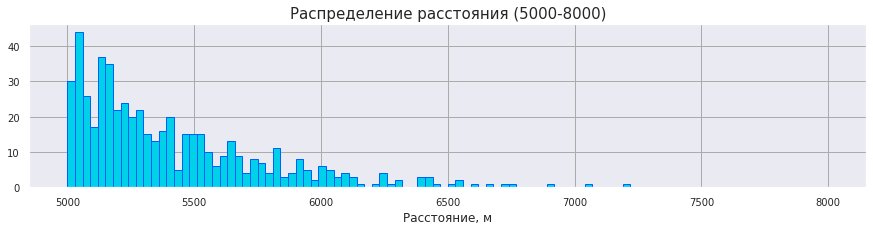

In [36]:
plt.figure(figsize=(15, 3))
riders_data['distance'].hist(range=(5000, 8000), bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение расстояния (5000-8000)', fontsize=15)
plt.xlabel('Расстояние, м', fontsize=12);

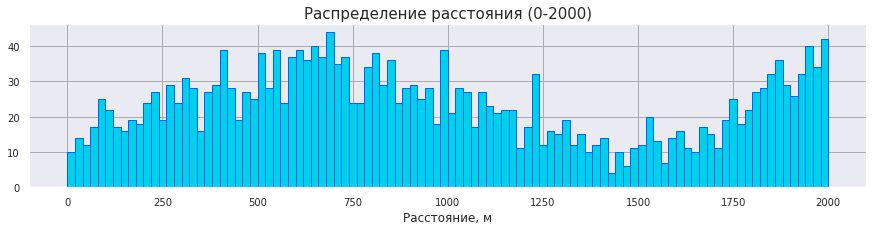

In [37]:
plt.figure(figsize=(15, 3))
riders_data['distance'].hist(range=(0, 2000), bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение расстояния (0-2000)', fontsize=15)
plt.xlabel('Расстояние, м', fontsize=12);

Среднее и медиана

In [38]:
round(riders_data['distance'].mean(), 2)

3070.66

In [39]:
round(riders_data['distance'].median(), 2)

3133.61

Среднее средних расстояний каждого пользователя

In [40]:
round(riders_data.groupby('user_id')['distance'].mean().mean(), 2)

3077.3

In [41]:
riders_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Распределение нормальное, среднее растояние поездки - 3070.66м, медиана - 3133.61м, среднее растояние, которое проехал пользователь 3077.3м. Имеются поездки меньше 1000м, можно предположить, что пользователи использует самокаты при любом удобном случае, например: доехать до ближайшего метро, доехать до магазина, и тд.

#### Исследуем продолжительность поездок

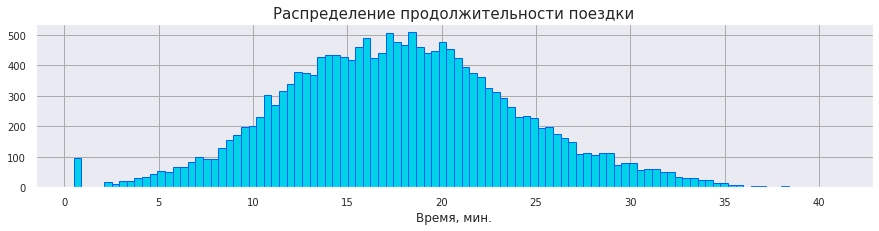

In [42]:
plt.figure(figsize=(15, 3))
riders_data['duration'].hist(bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение продолжительности поездки', fontsize=15)
plt.xlabel('Время, мин.', fontsize=12);

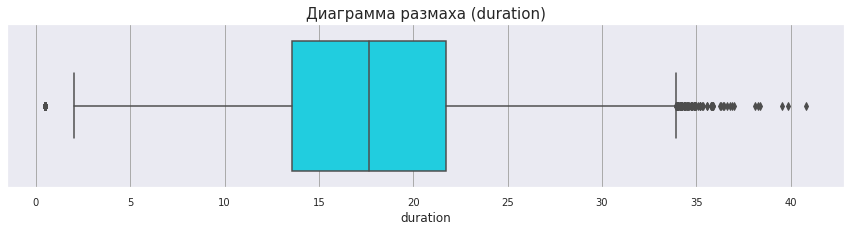

In [43]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=riders_data, x='duration', color='#01e6ff')
plt.title('Диаграмма размаха (duration)', fontsize=15);

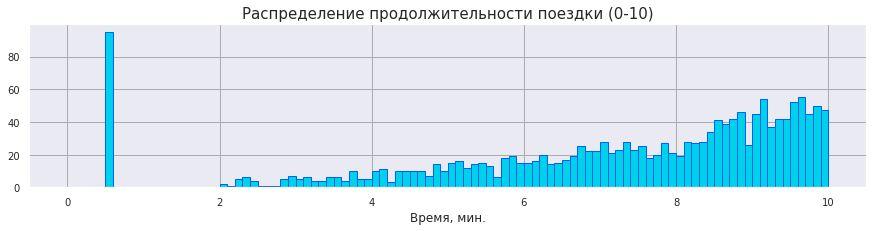

In [44]:
plt.figure(figsize=(15, 3))
riders_data['duration'].hist(range=(0, 10), bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение продолжительности поездки (0-10)', fontsize=15)
plt.xlabel('Время, мин.', fontsize=12);

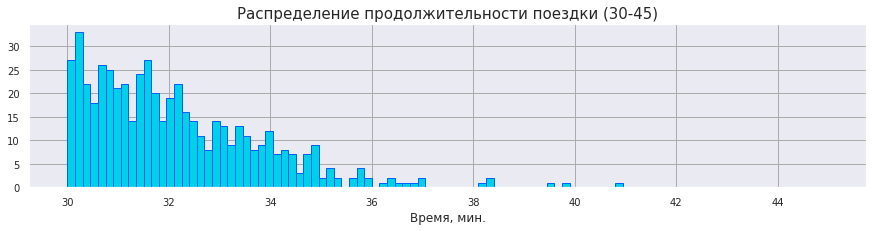

In [45]:
plt.figure(figsize=(15, 3))
riders_data['duration'].hist(range=(30, 45), bins=100, color='#00d1e8', edgecolor='#0060ff')
plt.title('Распределение продолжительности поездки (30-45)', fontsize=15)
plt.xlabel('Время, мин.', fontsize=12);

In [46]:
riders_data['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Среднее и медиана

In [47]:
round(riders_data['duration'].mean(), 2)

17.81

In [48]:
round(riders_data['duration'].median(), 2)

17.68

Среднее время поездки пользователя

In [49]:
round(riders_data.groupby('user_id')['duration'].mean().mean(), 2)

17.93

In [50]:
riders_data.query('duration < 2')['duration'].value_counts()

0.5    95
Name: duration, dtype: int64

<AxesSubplot:>

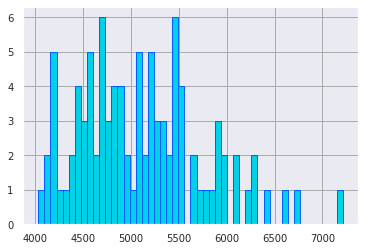

In [51]:
riders_data.query('duration < 2')['distance'].hist(bins=50, color='#00d1e8', edgecolor='#0060ff')

Распределение нормальное, имеется небольшой пик меньше минуты, при этом на диаграмме размаха отображено это как 1 точка, скорее всего, это какая то ошибка выгрузки данных, либо еще что-то. Среднее время поездки 17.81 минут

**Вывод:**


Больше всего пользователей сервиса GoFast в Пятигорске (219 пользователей) и меньше всего в Москве (168 пользователей)

Соотношение пользователей с подпиской на GoFast и без:
- Пользователей без подписки - 835 (54.4%)
- Пользователей c подпиской - 699 (45.6%)

Средний возраст пользователей сервиса GoFast составляет 25 лет

Распределение расстояния поездки - нормальное, среднее растояние поездки - 3070.66м, медиана - 3133.61м, среднее растояние, которое проехал пользователь 3077.3м. Имеются поездки меньше 1000м, можно предположить, что пользователи использует самокаты при любом удобном случае, например: доехать до ближайшего метро, доехать до магазина, и тд.

Среднее время поездки - 17.81 минуты, среднее время поездки пользователя 17.93 минут, медиана - 17.68, различие небольшое.
В данных есть аномалия в видеде значения 0.5 минуты (95 таких значений), при том, что пройденное расстояние для этих значений 4000м и больше. Если максимальная скорость самоката 25 км/ч, то 4км он проедет примерно за 9.6 минуты, но никак не за 0.5. Скорее всего какой-то баг.

### Шаг 4. Объединение данных

#### Объединим все данные в общий датафрейм

Количество строк таблицы, которую будем мержить с другими:

In [52]:
riders_data.shape[0]

18068

In [53]:
total_data = riders_data.merge(users_data, how='left', on='user_id') \
            .merge(subscriptions_data, how='left', on='subscription_type')

In [54]:
total_data.head(3)

,user_id,distance,duration,date,year,month,weekday,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,2021,1,4,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,2021,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,2021,4,1,Кира,22,Тюмень,ultra,6,0,199


In [55]:
total_data.shape[0]

18068

In [56]:
total_data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
year                 0
month                0
weekday              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Соединение таблиц прошло успешно, количество строк не поменялось, пропусков нет

#### Создадим датафреймы с подписками и без

In [57]:
data_sub = total_data.query('subscription_type == "ultra"')
data_sub.head(3)

,user_id,distance,duration,date,year,month,weekday,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,2021,1,4,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,2021,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,2021,4,1,Кира,22,Тюмень,ultra,6,0,199


In [58]:
data_without_sub = total_data.query('subscription_type == "free"')
data_without_sub.head(3)

,user_id,distance,duration,date,year,month,weekday,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,2021,1,5,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2021,2,0,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2021,2,3,Айдар,22,Омск,free,8,50,0


In [59]:
data_sub.shape[0] + data_without_sub.shape[0] == total_data.shape[0]

True

#### Визуализируем время и расстояние поездок для пользователей с подпиской и без

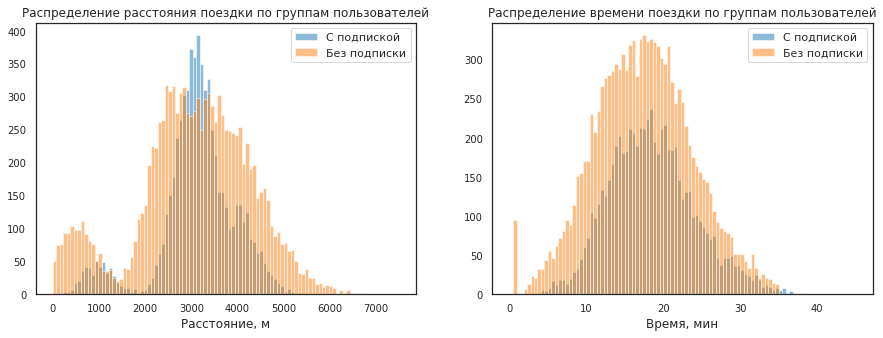

In [60]:
bins_1 = np.linspace(0, 7500, 100)

plt.figure(figsize=(15,5))
sns.set_style('white')

plt.subplot(121)
plt.hist(data_sub['distance'], bins_1, alpha=0.5, label='С подпиской')
plt.hist(data_without_sub['distance'], bins_1, alpha=0.5, label='Без подписки')
plt.title('Распределение расстояния поездки по группам пользователей')
plt.xlabel('Расстояние, м')
plt.legend(loc='upper right')

bins_2 = np.linspace(0, 45, 100)

plt.subplot(122)
plt.hist(data_sub['duration'], bins_2, alpha=0.5, label='С подпиской')
plt.hist(data_without_sub['duration'], bins_2, alpha=0.5, label='Без подписки')
plt.title('Распределение времени поездки по группам пользователей')
plt.xlabel('Время, мин')
plt.legend(loc='upper right')

In [61]:
data_sub[['distance', 'duration']].describe().round(2)

,distance,duration
count,6500.00,6500.00
mean,3115.45,18.54
std,836.90,5.57
min,244.21,3.76
25%,2785.44,14.52
50%,3148.64,18.18
75%,3560.57,21.88
max,5699.77,40.82


In [62]:
data_without_sub[['distance', 'duration']].describe().round(2)

,distance,duration
count,11568.00,11568.00
mean,3045.50,17.39
std,1246.17,6.33
min,0.86,0.50
25%,2366.56,12.96
50%,3114.65,17.33
75%,3905.70,21.59
max,7211.01,34.95


Посмотрим как отличается количество поездок до 1000м

In [63]:
data_sub.query('distance < 1000').shape[0]

259

In [64]:
round(data_sub.query('distance < 1000').shape[0] / data_sub.shape[0] * 100, 2)

3.98

In [65]:
data_without_sub.query('distance < 1000').shape[0]

1113

In [66]:
round(data_without_sub.query('distance < 1000').shape[0] / data_without_sub.shape[0] * 100, 2)

9.62

**Вывод:**

Пользователи с подпиской:
- Расстояние поездки
    - Среднее: 3115.45 м.
    - Медиана: 3148.64 м.
    - Стандартное отклонение: 836.90 м.

- Время поездки
    - Среднее: 18.54 мин.
    - Медиана: 18.18 мин.
    - Стандартное отклонение: 5.57 мин.

Пользователи без подписки:
- Расстояние поездки
    - Среднее: 3045.50 м.
    - Медиана: 3114.65 м.
    - Стандартное отклонение: 1246.17 м.
    
- Время поездки
    - Среднее: 17.39 мин.
    - Медиана: 17.33 мин.
    - Стандартное отклонение: 6.33 м.

По среднему расстоянию и медиане сильных отличий нет. А вот стандартое отклонение больше примерно на 400 у пользователей без подписки, это хорошо видно по гистограмме. Среднее и медиана времени поездки больше у пользователей с подпиской практически на минуту, стандартное отклонение примерно на 1 больше у пользователей без подписки. Т.е разброс данных больше у пользователей без подписки. Доля поездок меньше 1000 метров у пользователей с подпиской 4 процента, у пользователей без подписки 9.62 процента

### Шаг 5. Подсчёт выручки

#### Создадим сводную таблицу, чтобы подсчитать выручку

In [67]:
total_data['duration'] = np.ceil(total_data['duration'])
total_data.head(3)

,user_id,distance,duration,date,year,month,weekday,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,2021,1,4,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,2021,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,2021,4,1,Кира,22,Тюмень,ultra,6,0,199


In [68]:
revenue_data = total_data.groupby(['month', 'user_id']).agg({'distance': 'sum', 'age': 'count', 'duration': 'sum'})

In [69]:
revenue_data.columns = ['total_distance', 'count_trips', 'total_duration']

In [70]:
revenue_data.reset_index(inplace=True)

#### Добавим столбец с помесячной выручкой, которую принес каждый пользователь

In [71]:
revenue_data['revenue'] = 1
revenue_data['subscription_type'] = 'one'

In [72]:
revenue_data.loc[revenue_data['user_id'].isin(data_sub['user_id'].unique()), 'revenue'] = (
    data_sub['start_ride_price'].unique()[0] * revenue_data['count_trips']
    + data_sub['minute_price'].unique()[0] * revenue_data['total_duration']
    + data_sub['subscription_fee'].unique()[0]
)

revenue_data.loc[revenue_data['user_id'].isin(data_without_sub['user_id'].unique()), 'revenue'] = (
    data_without_sub['start_ride_price'].unique()[0] * revenue_data['count_trips']
    + data_without_sub['minute_price'].unique()[0] * revenue_data['total_duration']
    + data_without_sub['subscription_fee'].unique()[0]
)

revenue_data.loc[revenue_data['user_id'].isin(data_sub['user_id'].unique()), 'subscription_type'] = 'ultra'
revenue_data.loc[revenue_data['user_id'].isin(data_without_sub['user_id'].unique()), 'subscription_type'] = 'free'

In [73]:
revenue_data.head()

,month,user_id,total_distance,count_trips,total_duration,revenue,subscription_type
0,1,1,7027.511294,2,42.0,451.0,ultra
1,1,3,3061.777147,1,13.0,277.0,ultra
2,1,5,3914.646990,1,13.0,277.0,ultra
3,1,7,6478.080979,2,28.0,367.0,ultra
4,1,12,3577.151148,1,33.0,397.0,ultra


### Шаг 6. Проверка гипотез

#### Проверим гипотезу - больше ли длительность поездки у пользователей с подпиской 

H0 - длительность поездок у пользователей с подпиской и без равны

Н1 - длительность поездок у пользователей с подпиской больше, чем у пользователей без подписки

In [74]:
alpha = 0.05

In [75]:
results = st.ttest_ind(data_sub['duration'],
             data_without_sub['duration'],
             alternative='greater')

In [76]:
print(f'Значение p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Оснований отвергнуть нулевую гипотезу нет!')

Значение p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу в пользу альтернативной


#### Проверим гипотезу - не превышает ли среднее расстояние одной поездки для пользователей с подпиской значение 3130 м

H0 - среднее расстояние поездки пользователя с подпиской равно 3130м

Н1 - среднее расстояние поездки пользователя с подпиской больше 3130м

In [77]:
alpha = 0.05
distance = 3130

In [78]:
results = st.ttest_1samp(data_sub['distance'], distance, alternative='greater')

In [79]:
print(f'Значение p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Оснований отвергнуть нулевую гипотезу нет!')

Значение p-value: 0.9195368847849785
Оснований отвергнуть нулевую гипотезу нет!


#### Проверим гипотезу больше ли помесячная выручка для пользователей с подпиской

H0 - помесячные выручки равны для пользователей с подпиской и без

Н1 - помесячные выручки для пользователей с подпиской больше, чем для пользователей без подписки

Помесячная выручка от пользователей с подпиской на сервис GoFast

In [80]:
round(revenue_data.query('subscription_type == "ultra"').groupby('month')['revenue'].mean().mean(), 2)

362.67

Помесячная выручка от пользователей без подписки на сервис GoFast

In [81]:
round(revenue_data.query('subscription_type == "free"').groupby('month')['revenue'].mean().mean(), 2)

328.6

In [82]:
alpha = 0.05

In [83]:
results = st.ttest_ind(revenue_data.query('subscription_type == "ultra"')['revenue'],
                      revenue_data.query('subscription_type == "free"')['revenue'],
                      alternative='greater')

In [84]:
print(f'Значение p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Оснований отвергнуть нулевую гипотезу нет!')

Значение p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**6.4** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

```python
st.ttest_rel('данные после обновления', 'данные до обновления', alternative='greater')
```

### Вывод

**Предобработка данных**
- Изменение типа данных потребовалось только для столбца с датой
- Пропусков не обнаружено
- Явных дубликатов было 31 (удалены)

**Цели проекта**

- Исследовательский анализ
    
    В ходе исследования данных были выявлены следующие особенности:
   
    - В Пятигорске больше всего пользователей сервиса GoFast (219)
    - Москва остает от остальных городов по количеству пользователей (168)
    - 835 пользователей с подпиской (54.4%)
    - 699 пользователей без подписки (45.6%)
    - Средний возраст пользователей составляет 25 лет
    - Иногда пользователи проезжали менее 1000м (предположительно самокат использовался, чтобы добраться до каких-то ближайших мест: метро, магазин, остановка и тд)
    - Среднее расстояние за одну поездку - 3070.66 м.
    - Среднее время поездки - 17.81 минуты. 
    
    В данных (`riders_data` - данные о поездках) по времени поездки есть аномалия в виде значения 0.5 минуты (95 таких значений), при том, что пройденное расстояние для этих значений 4000м и больше. Для 4000м минимальное время при максимальной скорости самоката (25 км/ч) составляет примерно 9.6 минут. За 30 секунд преодолеть такое расстояние невозможно на самокате.
    
Различия пользователей:
    
Пользователи с подпиской:
- Расстояние поездки
    - Среднее: 3115.45 м.
    - Медиана: 3148.64 м.
    - Стандартное отклонение: 836.90 м.

- Время поездки
    - Среднее: 18.54 мин.
    - Медиана: 18.18 мин.
    - Стандартное отклонение: 5.57 мин.

Пользователи без подписки:
- Расстояние поездки
    - Среднее: 3045.50 м.
    - Медиана: 3114.65 м.
    - Стандартное отклонение: 1246.17 м.
    
- Время поездки
    - Среднее: 17.39 мин.
    - Медиана: 17.33 мин.
    - Стандартное отклонение: 6.33 м.

По среднему расстоянию и медиане сильных отличий нет. А вот стандартое отклонение больше примерно на 400 у пользователей без подписки. Среднее и медиана времени поездки больше у пользователей с подпиской практически на минуту, стандартное отклонение примерно на 1 больше у пользователей без подписки. Т.е разброс данных больше у пользователей без подписки. Доля поездок меньше 1000 метров у пользователей с подпиской 4 процента, у пользователей без подписки 9.62 процента

- Проверка гипотез
    - Гипотеза о том равна ли продолжительность поездки у пользователей с подпиской и без. Гипотеза была опровергнута в пользу пользователей с подпиской, у них продолжительность поездки больше.
    - Гипотеза о том равно ли среднее расстояние поездки значению 3130. Гипотеза о равенстве не была отвергнута. Т. е. можно утверждать, что среднее расстояние точно не превышает оптимальное.
    - Гипотеза о том равна ли помесячная выручка от пользователей с подпиской и пользователей без подписки. Гипотеза опровергнута средняя выручка от пользователей с подпиской больше 362.67 против 328.6.


**Рекомендации**

Разработчикам стоит проверить приложение, так как были обнаружены аномалии в данных по времени поездки. 95 наблюдений с значением 0.5 минуты, при это пройденное расстояние было больше 4000м

Пользователи с подпиской выгоднее для сервиса в среднем продолжительность их поездок больше на минуту, выручка с каждого пользователя больше, но в сумме выручка будет больше у пользователей без подписок, так как их больше, поэтому стоит предпринять меры по увеличению количества пользователей с подпиской.

### Шаг 7. Распределения

#### Задача 7.1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [85]:
k = 99
n_min = 99
p = 0.1
pval = 0.05
result = st.binom.cdf(k, n_min, p)

while result > pval:
    n_min += 1
    result = st.binom.cdf(k, n_min, p)
n_min

1161

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


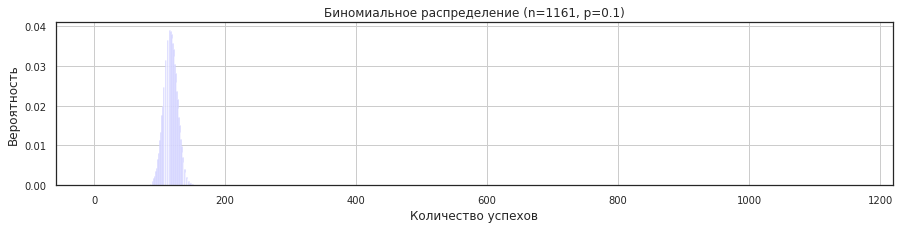

In [86]:
distr = []

for k in range(0, n_min + 1):
    current_value = st.binom.pmf(k, n_min, p)
    distr.append(current_value)

plt.figure(figsize=(15,3))
sns.set_style('white')
plt.bar(range(0, n_min + 1), distr, alpha=0.6, color='blue')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.title(f'Биномиальное распределение (n={n_min}, p={p})')
plt.grid(True)

**Ответ:** Требуется минимум 1161 промокод, чтобы вероятность не выполнить план была 0.05



 #### Задача 7.2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768


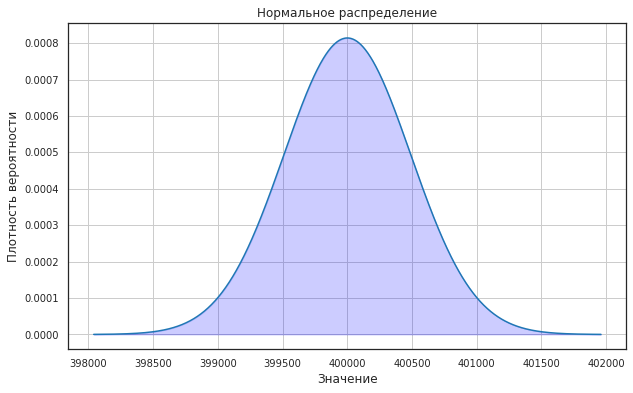

In [87]:
n = 1_000_000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

distribution = st.norm(mu, sigma)

print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {distribution.cdf(399500)}')

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf)
plt.fill_between(x, pdf, alpha=0.2, color='blue')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Нормальное распределение')
plt.grid(True)